In [48]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [49]:
#data
df=pd.read_csv('C:\Kate\Python\Authorship Attribution\data\\techcrunch_posts.csv')

In [50]:
len(df)

39115

In [51]:
df.head()

,authors,category,content,date,id,img_src,section,tags,title,topics,url
0,Dale Chang,Startups,\n\nTech investing isn’t what it used to be — ...,2016-10-15,1401293,https://tctechcrunch2011.files.wordpress.com/2...,startups/,data,How startups can use data to grow smarter,NaN,https://techcrunch.com/2016/10/15/how-startups...
1,"Ben Narasin,Jeremy Abelson",Fundings & Exits,\n\nThe IPO market is poised to make an almost...,2016-10-14,1399050,https://tctechcrunch2011.files.wordpress.com/2...,startups/,ipo,"While the IPO market roars back, venture remai...",NaN,https://techcrunch.com/2016/10/14/while-the-ip...
2,Matthew Lynley,Apps,Under pressure from shoppers complaining about...,2016-10-14,1401954,https://tctechcrunch2011.files.wordpress.com/2...,startups/,apoorva-mehta,"Instacart reverses course, re-introducing tips...",instacart,https://techcrunch.com/2016/10/14/instacart-re...
3,"Matthew Lynley,Ingrid Lunden",Fundings & Exits,"PayPal, the giant digital payments company tha...",2016-10-14,1390023,https://tctechcrunch2011.files.wordpress.com/2...,startups/,gofundme,PayPal mulled buying GoFundMe,paypal,https://techcrunch.com/2016/10/14/paypal-gobuyme/
4,Megan Rose Dickey,Startups,"Uber, the ridesharing behemoth that recently b...",2016-10-13,1401633,https://tctechcrunch2011.files.wordpress.com/2...,startups/,lawsuits,Uber hits another roadblock,uber,https://techcrunch.com/2016/10/13/uber-hits-an...


In [52]:
df.authors.unique()

array(['Dale Chang', 'Ben Narasin,Jeremy Abelson', 'Matthew Lynley', ...,
       'Andrew Keen', 'Gang Lu', 'Tarikh Korula'], dtype=object)

In [53]:
pd.DataFrame(df.groupby('authors').size().rename('counts')).sort_values('counts', ascending=False).head(10)

,counts
authors,
Sarah Perez,3772
Anthony Ha,3232
Ingrid Lunden,3026
Darrell Etherington,2895
Natasha Lomas,2555
Jordan Crook,2278
Josh Constine,2245
Steve O'Hear,1885
Rip Empson,1676


In [54]:
authors=['Sarah Perez','Anthony Ha','Darrell Etherington','Jordan Crook']

In [55]:
df=df[df['authors'].isin(authors)].ix[:,['authors','content']]
df.rename(columns={'authors':'author'}, inplace=True)
len(df)

12177

In [56]:
df['length'] = df['content'].str.len()
df.sort_values('length', ascending=True).head(10)

,author,content,length
11458,Darrell Etherington,We’ll be at Dogpatch Studios in SF to check ou...,341
11761,Darrell Etherington,Google didn’t go crazy and build a brand new C...,402
11654,Anthony Ha,Fitness tracker FitBit has updated the filing ...,432
30372,Jordan Crook,\t\nStartup Alley is a wondrous mix of foreign...,434
33944,Jordan Crook,\t\nStartup Alley is a wondrous mix of foreign...,434
2367,Darrell Etherington,I’ve been playing Pokémon Go for most of today...,451
791,Jordan Crook,Apple’s method of unveiling new products is me...,461
22958,Jordan Crook,Amazon is amped up right now. The company has ...,466
2350,Anthony Ha,A San Francisco judge has sentenced former Rad...,492
3271,Anthony Ha,"Brandcast, a startup allowing marketers and de...",508


In [57]:
df.drop(df[df.length<100].index, inplace=True)
len(df)

12177

In [58]:
pd.DataFrame(df.groupby('author').size().rename('counts')).sort_values('counts', ascending=False)

,counts
author,
Sarah Perez,3772
Anthony Ha,3232
Darrell Etherington,2895
Jordan Crook,2278


In [59]:
import random
from sklearn.cross_validation import train_test_split
#2000 random sample rows for each author
df_new=pd.DataFrame()
posts_train=pd.DataFrame()
posts_test=pd.DataFrame()
author_train=pd.DataFrame()
author_test=pd.DataFrame()
for a in df.author.unique():
    rows = random.sample(df[df['author']==a].index, 2000)
    df_temp = df.ix[rows]
    df_new=df_new.append(df_temp,ignore_index=True)    
    X_train, X_test, Y_train, Y_test = train_test_split(df_temp.ix[:,['content']], df_temp.ix[:,['author']], test_size=0.3, random_state=42)
    posts_train=posts_train.append(X_train, verify_integrity=False)
    posts_test=posts_test.append(X_test, verify_integrity=False)
    author_train=author_train.append(Y_train, verify_integrity=False)
    author_test=author_test.append(Y_test, verify_integrity=False)

Train set:

In [60]:
print (len(posts_train),len(author_train))

(5600, 5600)


Test set:

In [61]:
print(len(posts_test),len(author_test))

(2400, 2400)


In [62]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
def text_process(text):
    """
    Takes in a string of text, then performs the following:
    1. Tokenizes and removes punctuation
    3. Stems
    4. Returns a list of the cleaned text
    """

    # tokenizing
    tokenizer = RegexpTokenizer(r'\w+')
    text_processed=tokenizer.tokenize(text)
    
    
    # steming
    porter_stemmer = PorterStemmer()
    
    text_processed = [porter_stemmer.stem(word) for word in text_processed]
    

    return text_processed

In [63]:
ScoreSummaryByModelParams=list()

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [65]:
def ModelParamsEvaluation (f_union,model,params,comment):
    pipeline = Pipeline([
    # Extract the text & text_coded
    # Use FeatureUnion to combine the features from different vectorizers
    ('union', f_union),
    # Use a  classifier on the combined features
    ('clf', model)
    ])
    grid_search = GridSearchCV(estimator=pipeline, param_grid=params, verbose=1, cv=10)
    grid_search.fit(posts_train['content'], author_train['author'])
    #best score
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        ScoreSummaryByModelParams.append([comment,grid_search.best_score_,"\t%s: %r" % (param_name, best_parameters[param_name])])    

In [66]:
f2_union=FeatureUnion(
        transformer_list=[
            # Pipeline for pulling char features  from the text
            ('char', Pipeline([
                ('tfidf',     TfidfVectorizer(analyzer='char',ngram_range=(3, 3))),
            ])),
            # Pipeline for pulling stememd word features from the text
            ('text', Pipeline([
                ('tfidf',    TfidfVectorizer(analyzer='word',tokenizer= text_process,ngram_range=(1, 1))),
            ])),        

        ],

    )

In [67]:
from sklearn.svm import LinearSVC
#LinearSVC
p = {'clf__C': (1,0.1,0.01,0.001,0.0001)}
ModelParamsEvaluation(f2_union,LinearSVC(),p,'LinearSVC')

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed: 28.1min
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 28.7min finished


Best score: 0.985
Best parameters set:
	clf__C: 1


In [68]:
from sklearn.svm import SVC
p = {'clf__C': (1,0.1,0.01,0.001,0.0001)}
ModelParamsEvaluation(f2_union,SVC(kernel='linear'),p,'SVC, linear kernel')

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed: 366.4min
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 375.6min finished


Best score: 0.982
Best parameters set:
	clf__C: 1


In [69]:
from sklearn.linear_model import SGDClassifier
p = {'clf__alpha': (0.01,0.001,0.0001,0.00001, 0.000001),
    'clf__penalty': ('l1','l2', 'elasticnet')}
ModelParamsEvaluation (f2_union,SGDClassifier(),p,'SGD Classifier')

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed: 27.2min
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 83.5min finished


Best score: 0.985
Best parameters set:
	clf__alpha: 0.0001
	clf__penalty: 'elasticnet'


In [70]:
from sklearn.naive_bayes import BernoulliNB
p = {'clf__alpha': (1,0.1,0.01,0.001,0.0001,0)}
ModelParamsEvaluation(f2_union,BernoulliNB(),p,'Bernoulli Naive Bayes')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed: 26.4min
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 32.3min finished


Best score: 0.903
Best parameters set:
	clf__alpha: 0.0001


In [71]:
df_ScoreSummaryByModelParams=DataFrame(ScoreSummaryByModelParams,columns=['Method','BestScore','BestParameter'])
df_ScoreSummaryByModelParams.sort_values(['BestScore'],ascending=False,inplace=True)
df_ScoreSummaryByModelParams

,Method,BestScore,BestParameter
0,LinearSVC,0.985179,\tclf__C: 1
2,SGD Classifier,0.984643,\tclf__alpha: 0.0001
3,SGD Classifier,0.984643,\tclf__penalty: 'elasticnet'
1,"SVC, linear kernel",0.981786,\tclf__C: 1
4,Bernoulli Naive Bayes,0.902857,\tclf__alpha: 0.0001


In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [129]:
ScoreSummaryByVector = list()

In [130]:
def PredictionEvaluation(author_test_b,author_predictions_b,target_names,comment):
    Accuracy=accuracy_score(author_test_b,author_predictions_b)
    Recall=recall_score(author_test_b, author_predicted_b, labels=[0,1,2,3], average='macro')
    Precision=precision_score(author_test_b, author_predicted_b, labels=[0,1,2,3], average='macro')
    F1=f1_score(author_test_b, author_predicted_b, labels=[0,1,2,3], average='macro')
    ScoreSummaryByVector.append([Accuracy,Recall,Precision,F1,comment])
    print(classification_report(author_test_b, author_predicted_b, target_names=target_names))

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [132]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [133]:
def ModelRun (f_union,model):
    pipeline = Pipeline([
    # Extract the text & text_coded
    # Use FeatureUnion to combine the features from different vectorizers
    ('union', f_union),
    # Use a  classifier on the combined features
    ('clf', model)
    ])
    
    pipeline.fit(posts_train['content'], author_train['author'])
    
    author_predicted = pipeline.predict(posts_test['content'])
    
    feature_names=list()
    for p in (pipeline.get_params()['union'].transformer_list):
        fn=(p[0],pipeline.get_params()['union'].get_params()[p[0]].get_params()['tfidf'].get_feature_names())
        feature_names.append(fn)
    df_fn=pd.DataFrame()
    for fn in feature_names:
        df_fn= df_fn.append(pd.DataFrame(
        {'FeatureType': fn[0],
         'Feature': fn[1]
        }),
        ignore_index=True)    
    
    from sklearn.preprocessing import LabelBinarizer
    lb = LabelBinarizer()
    author_test_b = lb.fit_transform(author_test['author'])
    author_predicted_b  = lb.fit_transform(author_predicted)
    return (df_fn,pipeline.get_params()['clf'],author_predicted,author_predicted_b, author_test_b)

In [134]:
(feature_names,clf,author_predicted,author_predicted_b, author_test_b)=ModelRun(f2_union,BernoulliNB(alpha=0.0001))
target_names=clf.classes_

In [135]:
PredictionEvaluation(author_predicted_b, author_test_b,target_names,'BernoulliNB(alpha=0.0001)')

                     precision    recall  f1-score   support

         Anthony Ha       1.00      1.00      1.00       572
Darrell Etherington       1.00      1.00      1.00       575
       Jordan Crook       1.00      1.00      1.00       596
        Sarah Perez       1.00      1.00      1.00       657

        avg / total       1.00      1.00      1.00      2400



Confusion matrix, without normalization
[[551   1  26  22]
 [  5 528  32  35]
 [  6  22 534  38]
 [ 10  24   4 562]]


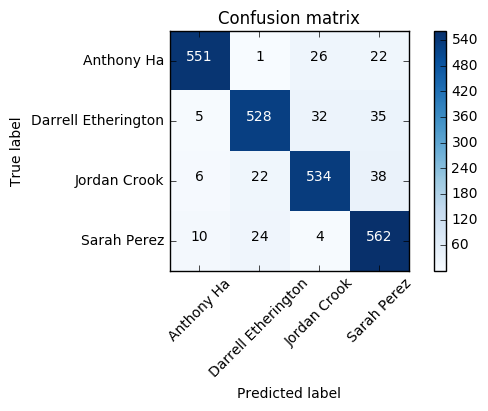

In [136]:
plot_confusion_matrix(confusion_matrix(author_test['author'], author_predicted), target_names,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [137]:
(feature_names,clf,author_predicted,author_predicted_b, author_test_b)=ModelRun(f2_union,LinearSVC(C=1))
target_names=clf.classes_

In [138]:
PredictionEvaluation(author_predicted_b, author_test_b,target_names,'LinearSVC(C=1)')

                     precision    recall  f1-score   support

         Anthony Ha       1.00      1.00      1.00       602
Darrell Etherington       1.00      1.00      1.00       608
       Jordan Crook       1.00      1.00      1.00       594
        Sarah Perez       1.00      1.00      1.00       596

        avg / total       1.00      1.00      1.00      2400



Confusion matrix, without normalization
[[594   1   2   3]
 [  2 595   2   1]
 [  2  10 587   1]
 [  4   2   3 591]]


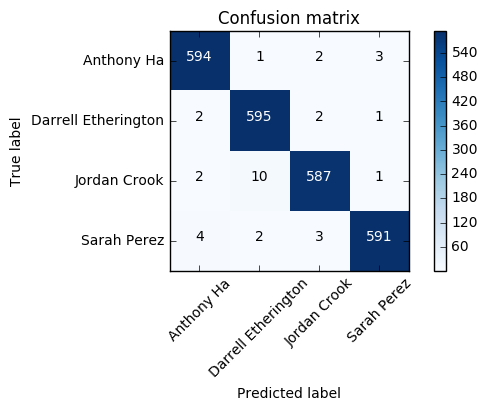

In [139]:
plot_confusion_matrix(confusion_matrix(author_test['author'], author_predicted), target_names,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [140]:
df_ScoreSummaryByVector=DataFrame(ScoreSummaryByVector,columns=['Precision','Accuracy','Recall','F1','Comment'])
df_ScoreSummaryByVector.sort_values(['F1'],ascending=False,inplace=True)
df_ScoreSummaryByVector

,Precision,Accuracy,Recall,F1,Comment
0,0.90625,1.0,1.0,1.0,BernoulliNB(alpha=0.0001)
1,0.98625,1.0,1.0,1.0,LinearSVC(C=1)
